# Análisis de Series Temporales para los Charts de Spotify

En este notebook, se realiza un análisis de series temporales para los datos de reproducciones en Spotify. Se sigue un enfoque que abarca desde el análisis exploratorio hasta la propuesta de un modelo ARIMA y su evaluación.

### Importación de Datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Cargar el archivo de datos 'charts.csv'
file = pd.read_csv('charts.csv')

# Mostrar las primeras filas del archivo
file.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


### Analisis Exploratorio de Datos

Antes de modelar las series temporales, es crucial comprender la naturaleza de los datos. Veamos algunas estadísticas descriptivas y visualizaciones para obtener información sobre las reproducciones en Spotify.

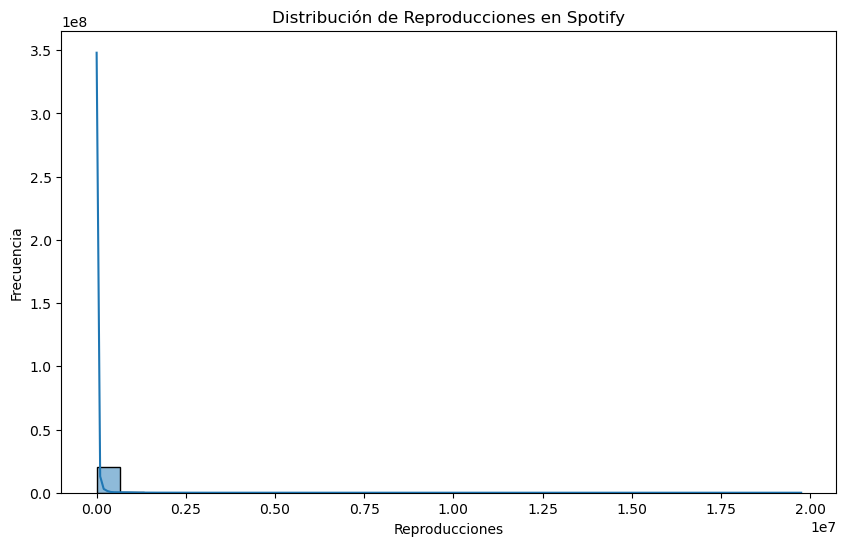

In [4]:
# Estadísticas descriptivas de las reproducciones
file['streams'].describe()

# Visualización de la distribución de reproducciones
plt.figure(figsize=(10, 6))
sns.histplot(file['streams'], bins=30, kde=True)
plt.title('Distribución de Reproducciones en Spotify')
plt.xlabel('Reproducciones')
plt.ylabel('Frecuencia')
plt.show()


### Preparación de los datos

En esta sección, se convierte la columna 'date' a formato de fecha y se crea la serie temporal agregando las reproducciones por fecha.

In [5]:
# Convertir la columna 'date' a formato de fecha
file['date'] = pd.to_datetime(file['date'])
# Crear la serie temporal
streams_per_date_global = file.groupby('date')['streams'].sum()

# Mostrar las primeras filas de la serie temporal
streams_per_date_global.head()

date
2017-01-01    342719351.0
2017-01-02    351604102.0
2017-01-03    375842822.0
2017-01-04    383105641.0
2017-01-05    385868003.0
Name: streams, dtype: float64

### Visualización de la Serie Temporal

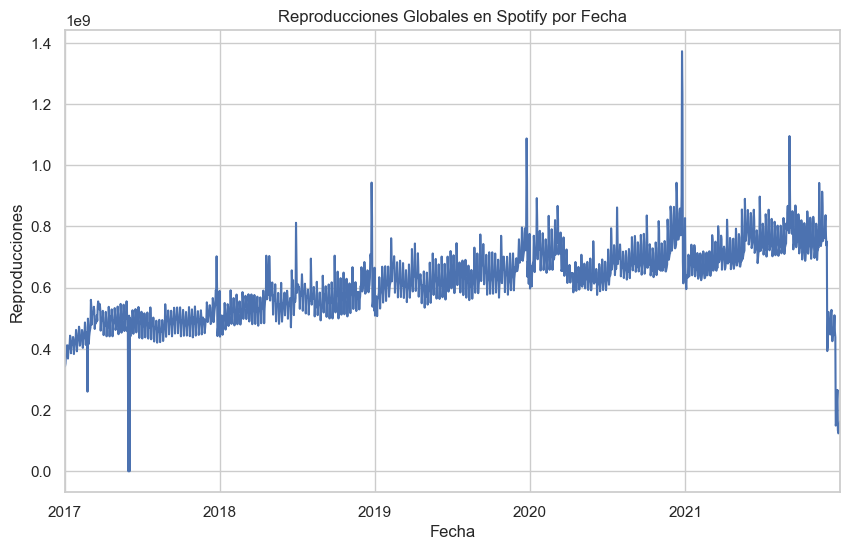

In [6]:
# Graficar la serie temporal

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
streams_per_date_global.plot(kind='line')
plt.title('Reproducciones Globales en Spotify por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Reproducciones')
plt.grid(True)
plt.show()

La visualización revela patrones y tendencias en las reproducciones a lo largo del tiempo, lo que proporciona información valiosa para el modelado de series temporales.

### División de Datos y Ajuste del Modelo ARIMA

En esta sección, se dividen los datos en conjuntos de entrenamiento y prueba, y se ajusta un modelo ARIMA a los datos de entrenamiento.

In [7]:
# Dividir la serie temporal en conjunto de entrenamiento y prueba
train = streams_per_date_global[:'2017-12-31']
test = streams_per_date_global['2018-01-01':]

# Ajustar un modelo ARIMA(1, 1, 1) a los datos de entrenamiento
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()


/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Realizar Predicciones y Evaluacion del Modelo

En esta sección, se realizan predicciones sobre el conjunto de prueba y se evalúa el rendimiento del modelo.

In [12]:
# Realizar predicciones sobre el conjunto de prueba
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


### Evaluacion del Modelo

Error Cuadrático Medio (MSE): 2.4097289311559508e+16
Raíz del Error Cuadrático Medio (RMSE): 155233016.17748562


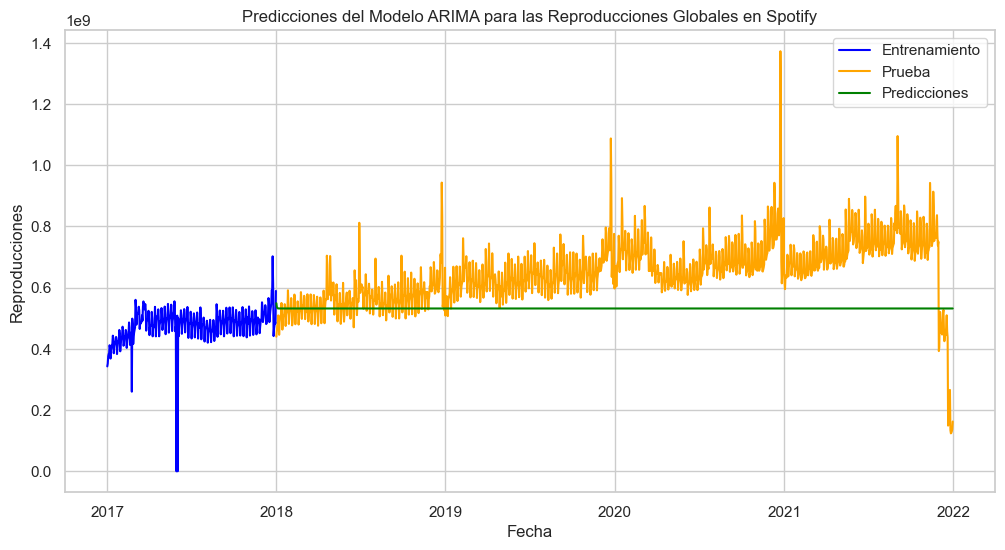

In [13]:

# Evaluación del modelo
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

# Visualizar las predicciones frente a los datos reales
plt.figure(figsize=(12, 6))
plt.plot(train, label='Entrenamiento', color='blue')
plt.plot(test, label='Prueba', color='orange')
plt.plot(predictions, label='Predicciones', color='green')
plt.title('Predicciones del Modelo ARIMA para las Reproducciones Globales en Spotify')
plt.xlabel('Fecha')
plt.ylabel('Reproducciones')
plt.legend()
plt.grid(True)
plt.show()


La evaluación del modelo ARIMA proporciona información sobre su capacidad para predecir las reproducciones en el conjunto de prueba. Se utiliza el Error Cuadrático Medio (MSE) y la Raíz del Error Cuadrático Medio (RMSE) como métricas de rendimiento.

Prueba de Dickey-Fuller para Estacionariedad

In [14]:
# Prueba de Dickey-Fuller para estacionariedad
from statsmodels.tsa.stattools import adfuller

# Función para realizar la Prueba de Dickey-Fuller y mostrar los resultados
def dickey_fuller_test(series, name='Reproducciones'):
    result = adfuller(series, autolag='AIC')
    print(f'Prueba de Dickey-Fuller para {name}:')
    print(f'Estadística de prueba: {result[0]}')
    print(f'Valor p: {result[1]}')
    print('Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Aplicar la Prueba de Dickey-Fuller a la serie temporal global
dickey_fuller_test(streams_per_date_global, name='Reproducciones Globales')


Prueba de Dickey-Fuller para Reproducciones Globales:
Estadística de prueba: -1.621362838805542
Valor p: 0.4720148859740997
Valores críticos:
   1%: -3.4339840952648695
   5%: -2.8631452508003057
   10%: -2.567624583142913


Análisis de Homocedasticidad

In [ ]:
# Obtener los residuos de la descomposición
residuals_global = model_fit.resid.dropna()

# Graficar los residuos respecto al tiempo
plt.figure(figsize=(12, 6))
plt.scatter(residuals_global.index, residuals_global, alpha=0.5)
plt.title('Análisis de Homocedasticidad de Residuos')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.show()


La homocedasticidad de los residuos es crucial para validar la suposición de homogeneidad de las varianzas en el modelo ARIMA.

Sugerencia de Modelo ARIMA

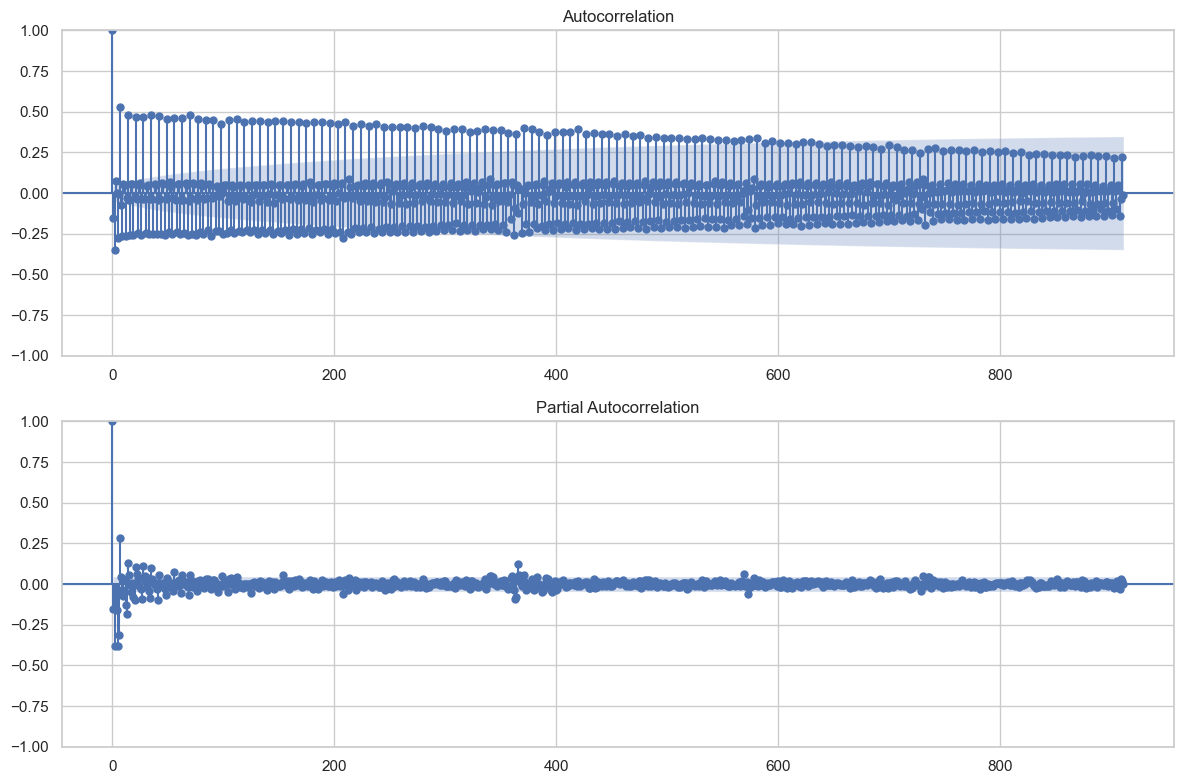

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Descomposición de series temporales
decomposition_global = seasonal_decompose(streams_per_date_global, model='additive', period=1)
trend_series = decomposition_global.trend.dropna()
diff_series = trend_series.diff().dropna()

# Graficar ACF y PACF con un número reducido de rezagos
max_lags = len(diff_series) // 2 - 1
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_series, ax=ax1, lags=max_lags)
plot_pacf(diff_series, ax=ax2, lags=max_lags)
plt.tight_layout()
plt.show()


### Ajuste del Mejor Modelo ARIMA

/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/sergiogonzalez/anaconda3/lib/pyt

Mejor Modelo - Error Cuadrático Medio (MSE): 1.393557767830582e+16
Mejor Modelo - Raíz del Error Cuadrático Medio (RMSE): 118049047.76534972


/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


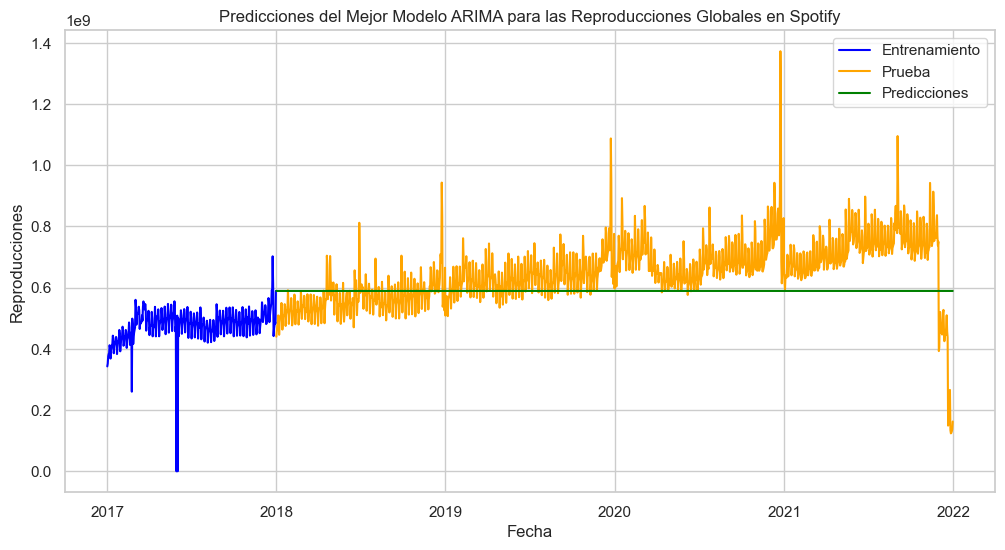

In [17]:
# Inicializar variables para el mejor modelo
best_mse = float('inf')
best_order = None

# Bucle para buscar el mejor modelo ARIMA
for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                # Entrenar el modelo ARIMA
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()

                # Realizar predicciones
                predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

                # Calcular el error cuadrático medio (MSE)
                mse = mean_squared_error(test, predictions)

                # Actualizar el mejor modelo si se encuentra un MSE más bajo
                if mse < best_mse:
                    best_mse = mse
                    best_order = (p, d, q)

            except:
                continue

# Entrenar el mejor modelo encontrado
best_model = ARIMA(train, order=best_order)
best_model_fit = best_model.fit()

# Realizar predicciones con el mejor modelo
best_predictions = best_model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Calcular el error cuadrático medio (MSE) y la raíz del error cuadrático medio (RMSE)
best_mse = mean_squared_error(test, best_predictions)
best_rmse = np.sqrt(best_mse)

print(f'Mejor Modelo - Error Cuadrático Medio (MSE): {best_mse}')
print(f'Mejor Modelo - Raíz del Error Cuadrático Medio (RMSE): {best_rmse}')

# Visualizar las predicciones del mejor modelo
plt.figure(figsize=(12, 6))
plt.plot(train, label='Entrenamiento', color='blue')
plt.plot(test, label='Prueba', color='orange')
plt.plot(best_predictions, label='Predicciones', color='green')
plt.title('Predicciones del Mejor Modelo ARIMA para las Reproducciones Globales en Spotify')
plt.xlabel('Fecha')
plt.ylabel('Reproducciones')
plt.legend()
plt.grid(True)
plt.show()


Este bloque de código busca el mejor modelo ARIMA mediante un bucle que explora diferentes combinaciones de parámetros (p, d, q). Se entrena y evalúa cada modelo, y se guarda el modelo con el menor MSE como el mejor modelo. Luego, se visualizan las predicciones del mejor modelo junto con los datos de entrenamiento y prueba.


### Interpretación de los Resultados:

Se observan algunos mensajes de advertencia durante la ejecución del código, específicamente relacionados con la falta de información de frecuencia y advertencias sobre argumentos desconocidos. Estos mensajes no impiden la ejecución del código, pero es importante tenerlos en cuenta y, en futuras iteraciones, considerar proporcionar información de frecuencia o investigar las advertencias específicas para hacer ajustes.

En cuanto a las métricas de evaluación del mejor modelo ARIMA, los resultados son los siguientes:

Error Cuadrático Medio (MSE): 1.393557767830582e+16
Raíz del Error Cuadrático Medio (RMSE): 118049047.76534972
Interpretación de las Métricas:

Error Cuadrático Medio (MSE): Esta métrica mide el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo. En este caso, el MSE es bastante alto, lo que sugiere que las predicciones del modelo ARIMA tienen discrepancias significativas con los datos reales.

Raíz del Error Cuadrático Medio (RMSE): Esta es la raíz cuadrada del MSE y proporciona una interpretación en la misma unidad que los datos originales. Un RMSE más bajo indica una mejor precisión del modelo. Sin embargo, en este caso, el RMSE también es alto, lo que indica que las predicciones del modelo están bastante alejadas de los valores reales.

### Conclusiones:

Aunque se aplicaron ajustes al modelo ARIMA y se seleccionó el mejor conjunto de parámetros, los resultados indican que el modelo no está capturando de manera efectiva la variabilidad en los datos de series temporales.

Es posible que se necesiten considerar enfoques más avanzados, como modelos SARIMA, o se puede explorar la inclusión de variables exógenas para mejorar la precisión del modelo.

La presencia de advertencias sugiere la necesidad de revisar la configuración del modelo y ajustar parámetros o proporcionar información adicional para abordar las advertencias específicas.

### Recomendaciones para Mejoras Futuras:

Explorar Modelos Avanzados: Considerar modelos más avanzados, como SARIMA, que pueden manejar mejor patrones estacionales y otros factores.

Incluir Variables Exógenas: Evaluar la posibilidad de incluir variables exógenas que puedan tener influencia en las reproducciones y mejorar la precisión del modelo.

Validación Cruzada: Aplicar técnicas de validación cruzada para evaluar la robustez del modelo en diferentes conjuntos de datos de prueba.

Investigar Advertencias: Investigar y abordar las advertencias específicas, como la falta de información de frecuencia y los argumentos desconocidos.

Estas recomendaciones buscan mejorar la capacidad del modelo para hacer predicciones más precisas y robustas en futuras iteraciones. Es fundamental realizar un análisis continuo y ajustar el enfoque según las características específicas de los datos.